In [1]:
import mne
import numpy as np
import h5py
import matplotlib
import warnings
import sys

%matplotlib inline
warnings.filterwarnings("ignore")  # Ignor warnings
sys.path.insert(0, '/Users/basilminkov/Scripts/python3/Neuroimaging/nfblab_data/')
from nfblab_data import NFBLabData 

import matplotlib.pyplot as plt
from scipy.signal import firwin, filtfilt

fig_size = [8, 6]  # Set figure size
plt.rcParams["figure.figsize"] = fig_size

In [2]:
channels_path = "/Users/basilminkov/Scripts/python3/Neuroimaging/stat/chanlocs_mod.mat"
data_path = [
    "/Users/basilminkov/Neuroscience/Data/Test/19.02.17/dasha_1_02-19_21-00-01/",
    "/Users/basilminkov/Neuroscience/Data/Test/19.02.17/dasha_1_control_02-19_21-22-31/",
    "/Users/basilminkov/Neuroscience/Data/Test/19.02.17/dasha_2_02-19_21-33-49/",
            ]
data_list = [NFBLabData(data_path[i], channels_path, get_info=False) for i in range(len(data_path))]

Empty reference list!
Empty reference list!
Empty reference list!


In [3]:
data_list[0].data_set[:, 28] # P4 electrode data

array([  7.81249980e-07,   4.54101564e-06,   5.95703114e-06, ...,
        -4.39453117e-07,  -2.92968735e-07,  -2.53906251e-06])

In [4]:
srate = 500
order = 400
band = np.array([7, 14])
b = firwin(order, band*2/srate, width=None, window='hamming', pass_zero=False)
a = 1

for i in range(len(data_list)):
    data_list[i] = filtfilt(b, a, data_list[i].data_set[:,28])

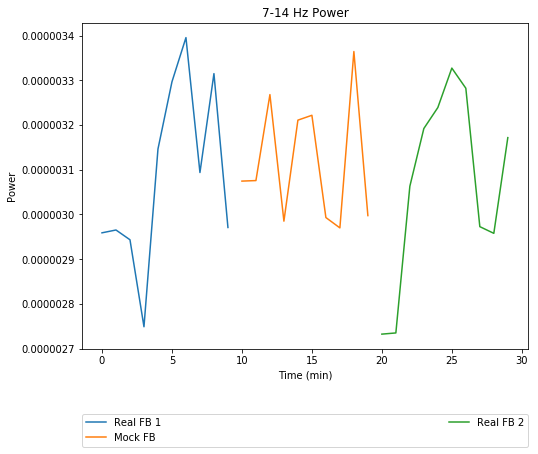

In [11]:
n_int = 10  # calculate power each minute 
plt.plot(np.arange(n_int*0, n_int), list(map(np.std, np.array_split(data_list[0], n_int))), label="Real FB 1")
plt.plot(np.arange(n_int, n_int*2), list(map(np.std, np.array_split(data_list[1], n_int))), label="Mock FB")
plt.plot(np.arange(n_int*2, n_int*3), list(map(np.std, np.array_split(data_list[2], n_int))), label="Real FB 2")
plt.xlabel("Time (min)")
plt.ylabel("Power")
plt.title("7-14 Hz Power")
plt.legend(bbox_to_anchor=(0., -0.3, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()